# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [55]:
df = pd.read_csv('Classified Data')
df = df.iloc[:, 1:]     # Since the first column is just the ID

### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [57]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [58]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [59]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[233,  17],
       [ 24, 226]], dtype=int64)

***Print Misclassification error rate***

In [63]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error Rate: ', mean_squared_error(y_test, pred))

Mean Squared Error Rate:  0.082


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [64]:
from sklearn.model_selection import cross_val_predict

In [65]:
error = []
best_k, best_error = 0, float('inf')
for k in range(1, 500): 
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y)
    error_value = mean_squared_error(y, y_pred)
    error.append(error_value)
    if error_value < best_error:
        best_error = error_value
        best_k = k

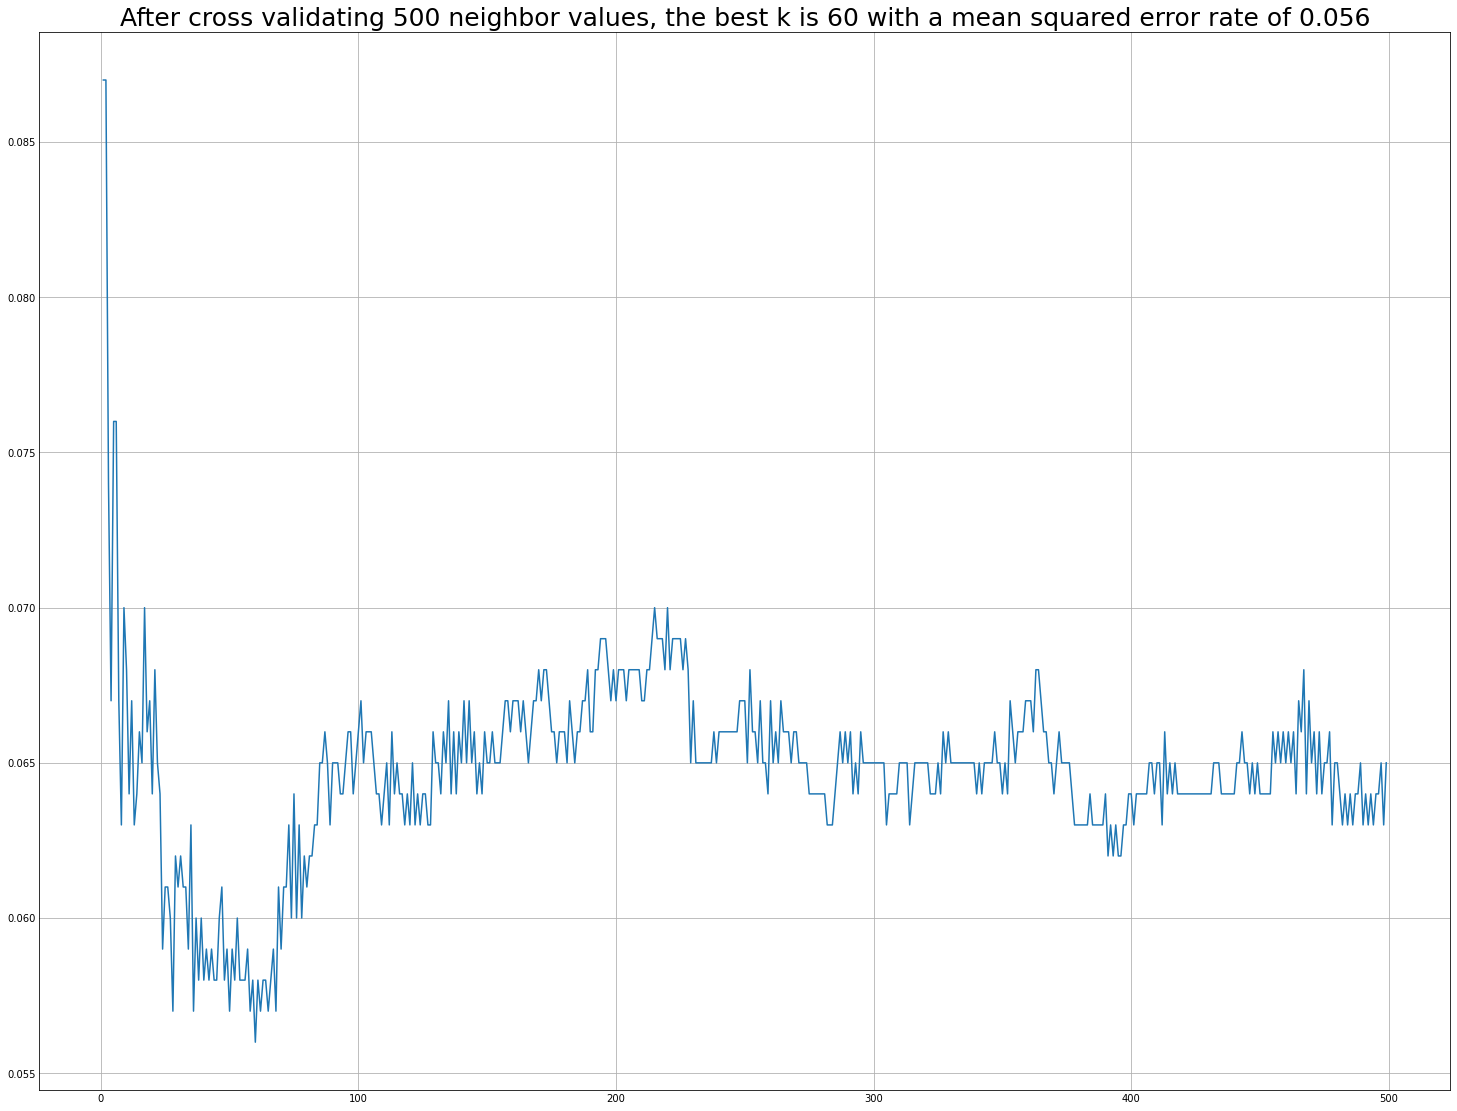

In [67]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(20, 15))
plt.title(f'After cross validating 500 K values, the best k is {best_k} with a mean squared error rate of {best_error}', fontsize = 25)
plt.plot(range(1, len(error) + 1), error)
plt.show()